<a href="https://colab.research.google.com/github/hardikroutray/ECG/blob/main/CNN_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries or install unavailable libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
from imutils import paths
import time   # time1 = time.time(); print('Time taken: {:.1f} sec'.format(time.time() - time1))
import cv2
import pickle
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from sklearn.metrics import plot_confusion_matrix

In [4]:
# from google.colab import drive
# drive.mount._DEBUG = True
# drive.mount('/content/MyDrive', force_remount=True)
!ls /content/MyDrive/MyDrive/ECG/data_v2/

ECGImagesofMyocardialInfarctionPatients
ECGImagesofPatientthathaveabnormalheartbeat
ECGImagesofPatientthathaveHistoryofMI
NormalPersonECGImages


# **Study and process images for input into NN**

1.   A 12-lead based ECG image standard in hospitals
2.   A single image need to be cropped (better option ?) into 12 images. As a first pass, the entire image is used for classification
3. Each image is converted to a np array


<class 'PIL.Image.Image'>
None
L
(450, 250)


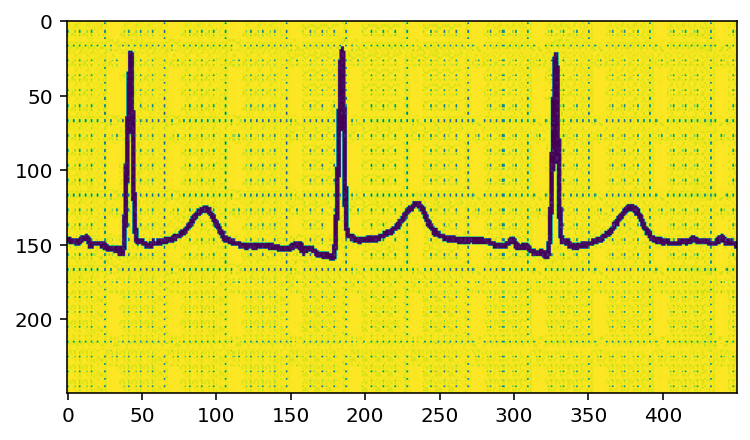

In [5]:
img = image.load_img('/content/MyDrive/MyDrive/ECG/data_v2/NormalPersonECGImages/Cropped_Images/Normal_100Cropped_lead4.png', grayscale=True, target_size=(250,450)) #target_size=(28,28), grayscale=True

print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
plt.imshow(img)

In [6]:
img_array = image.img_to_array(img)
print(img_array.dtype)
print(img_array.shape)
img_back = image.array_to_img(img_array)
# plt.imshow(img_back)

float32
(250, 450, 1)


In [7]:
#Make a dataframe with first column as the path to images and the second column as the labels
import os

images = []
labels = []

dirs = ['ECGImagesofMyocardialInfarctionPatients', 'ECGImagesofPatientthathaveabnormalheartbeat', 'ECGImagesofPatientthathaveHistoryofMI', 'NormalPersonECGImages']

for dir in dirs:
  print(dir)
  for filename in os.listdir('/content/MyDrive/MyDrive/ECG/data_v2/{}/Cropped_Images/'.format(dir)):
    if filename.endswith("png") and "lead4" in filename: 
      # print(dir,filename)
      images.append('/content/MyDrive/MyDrive/ECG/data_v2/{}/Cropped_Images/{}'.format(dir,filename))
      # if dir == 'ECGImagesofCOVID-19Patients':
      #   labels.append(1)
      if dir == 'ECGImagesofMyocardialInfarctionPatients':
        labels.append(1)
      elif dir == 'ECGImagesofPatientthathaveabnormalheartbeat':
        labels.append(2)
      elif dir == 'ECGImagesofPatientthathaveHistoryofMI':
        labels.append(3)
      elif dir == 'NormalPersonECGImages':
        labels.append(0)

df = pd.DataFrame({"image":images, "label":labels})
df
df.to_csv("ECG_cropped_lead13.csv", index=False)
!cp "ECG_cropped_lead13.csv" "/content/MyDrive/MyDrive/ECG/"

ECGImagesofMyocardialInfarctionPatients
ECGImagesofPatientthathaveabnormalheartbeat
ECGImagesofPatientthathaveHistoryofMI
NormalPersonECGImages


In [8]:
df

,image,label
0,/content/MyDrive/MyDrive/ECG/data_v2/ECGImages...,1
1,/content/MyDrive/MyDrive/ECG/data_v2/ECGImages...,1
2,/content/MyDrive/MyDrive/ECG/data_v2/ECGImages...,1
3,/content/MyDrive/MyDrive/ECG/data_v2/ECGImages...,1
4,/content/MyDrive/MyDrive/ECG/data_v2/ECGImages...,1
...,...,...
923,/content/MyDrive/MyDrive/ECG/data_v2/NormalPer...,0
924,/content/MyDrive/MyDrive/ECG/data_v2/NormalPer...,0
925,/content/MyDrive/MyDrive/ECG/data_v2/NormalPer...,0
926,/content/MyDrive/MyDrive/ECG/data_v2/NormalPer...,0


# **Convert all images into np arrays and divide into training and test dataset, build the model and train your network**

In [16]:
imagedata = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('{}'.format(df["image"][i]), target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    imagedata.append(img)
X = np.array(imagedata)

100%|██████████| 928/928 [00:03<00:00, 235.86it/s]


In [17]:
y=df['label'].values
y = to_categorical(y) #one-hot encoding

In [ ]:
# np.save('X_data_v1_croppedimages_.npy', X)
# !cp "X_data_v1_fullimages.npy" "/content/MyDrive/MyDrive/ECG/"

# np.save('y_data_v1_fullimages.npy', y)
# !cp "y_data_v1_fullimages.npy" "/content/MyDrive/MyDrive/ECG/"

In [ ]:
# X_load = np.load('/content/MyDrive/MyDrive/ECG/X_data_v1_fullimages.npy')
# y_load = np.load('/content/MyDrive/MyDrive/ECG/y_data_v1_fullimages.npy')
# print(X_load)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2, stratify=y)

In [31]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [34]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
24/24 [==============================] - 7s 269ms/step - loss: 1.3922 - accuracy: 0.2605 - val_loss: 1.3712 - val_accuracy: 0.3065
Epoch 2/20
24/24 [==============================] - 6s 260ms/step - loss: 1.3811 - accuracy: 0.2951 - val_loss: 1.3693 - val_accuracy: 0.3065
Epoch 3/20
24/24 [==============================] - 6s 259ms/step - loss: 1.3708 - accuracy: 0.2955 - val_loss: 1.3394 - val_accuracy: 0.3065
Epoch 4/20
24/24 [==============================] - 6s 259ms/step - loss: 1.3241 - accuracy: 0.3575 - val_loss: 1.1831 - val_accuracy: 0.4624
Epoch 5/20
24/24 [==============================] - 6s 260ms/step - loss: 1.1717 - accuracy: 0.4785 - val_loss: 1.0161 - val_accuracy: 0.6237
Epoch 6/20
24/24 [==============================] - 6s 261ms/step - loss: 0.9582 - accuracy: 0.6292 - val_loss: 0.8323 - val_accuracy: 0.6559
Epoch 7/20
24/24 [==============================] - 6s 258ms/step - loss: 0.7714 - accuracy: 0.7131 - val_loss: 0.7384 - val_accuracy: 0.7258
Epoch 

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8266959190368652
Test accuracy: 0.8602150678634644


In [36]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


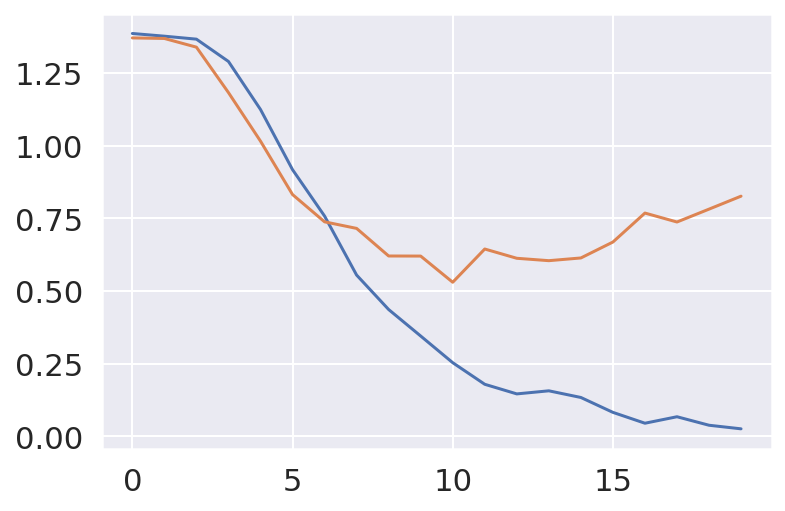

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

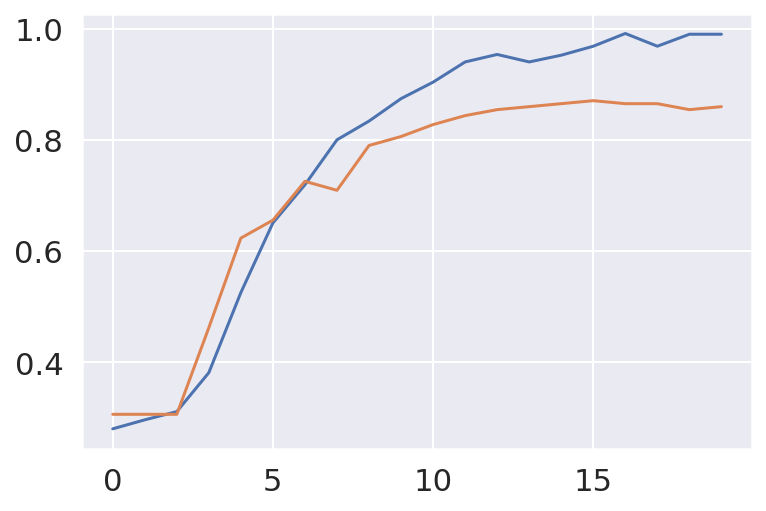

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [39]:
import sklearn.metrics as metrics

y_test_pred = model.predict(X_test)  
y_test_pred_labels = np.argmax(y_test_pred, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
# print(y_test_pred_labels)
y_test_labels = np.argmax(y_test, axis=1)
# print(y_test_labels)
confusion_matrix = metrics.confusion_matrix(y_true=y_test_labels, y_pred=y_test_pred_labels)  

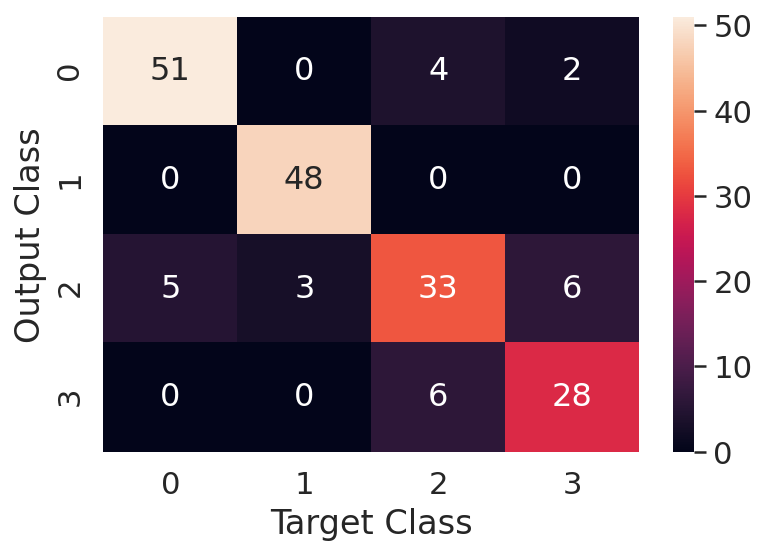

In [40]:
df_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size

plt.xlabel("Target Class")
plt.ylabel("Output Class")

plt.show()